<a href="https://colab.research.google.com/github/rickiepark/the-ml-book/blob/main/Ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장 기본 알고리즘

## 3.1 선형 회귀

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


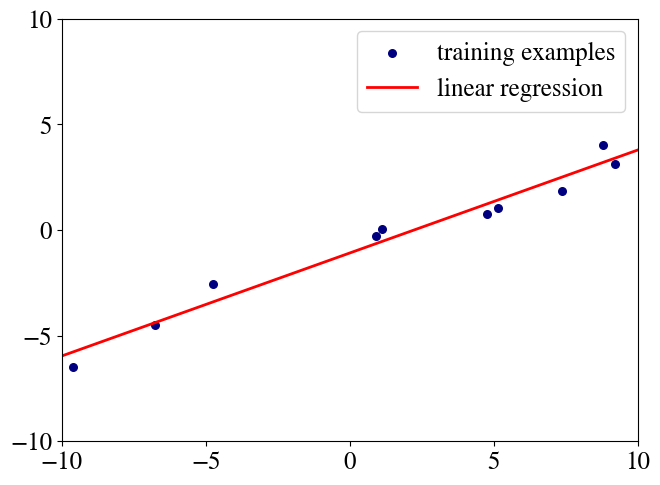

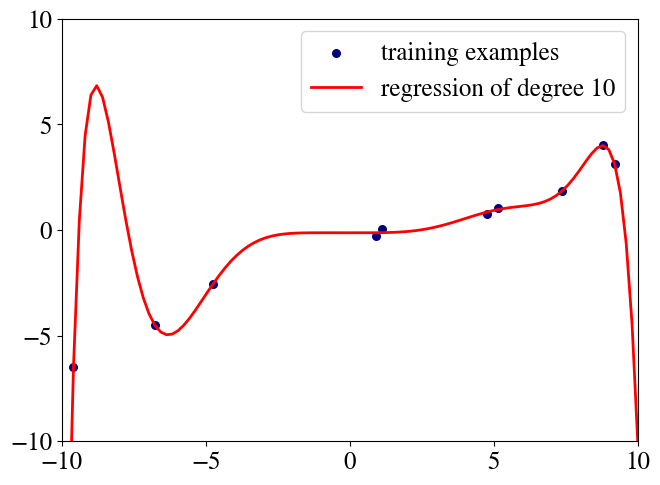

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

def f(x):
    """ function to approximate by polynomial interpolation"""
    return 0.5 * x

# generate points used to plot
x_plot = np.linspace(-10, 10, 100)

# generate points and keep a subset of them
x = np.linspace(-10, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:10])
noize = [(-2 + np.random.random()*2) for i in range(len(x))]
y = f(x) + noize

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['red', 'red']#, 'orange'
lw = 2

type_of_regression = ["linear regression", "regression of degree 10"]
fit = ["fit", "overfit"]
for count, degree in enumerate([1,10]):
    plt.figure(count)
    axes = plt.gca()
    axes.set_xlim([-10,10])
    axes.set_ylim([-10,10])
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training examples")
    plt.xticks([-10.0, -5.0, 0.0, 5.0, 10.0])
    plt.yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label=type_of_regression[count])

    plt.legend(loc='best')
    fig1 = plt.gcf()
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)

plt.show()

## 3.2 로지스틱 회귀

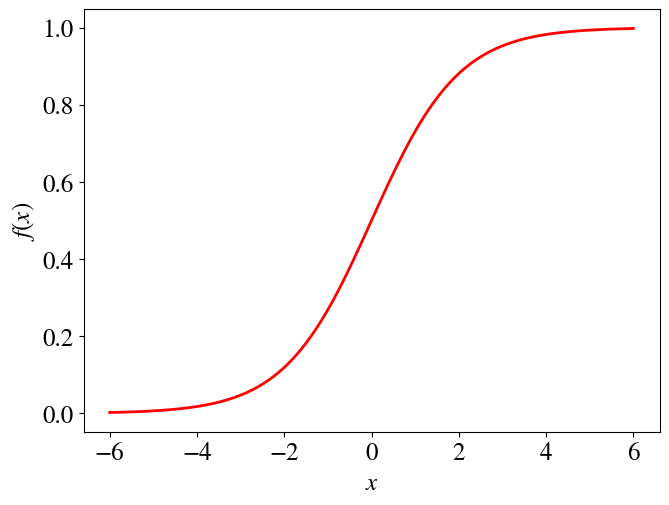

In [2]:
import matplotlib.pylab as plt
import matplotlib
import numpy as np

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

def sigmoid(x):
    """
    evaluate the boltzman function with midpoint xmid and time constant tau
    over x
    """
    return 1. / (1. + np.exp(-x))


x = np.linspace(-6, 6, 100)
S = sigmoid(x)
plt.plot(x, S, color='red', lw=2)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

fig1 = plt.gcf()
fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
plt.show()

## 3.4 서포트 벡터 머신

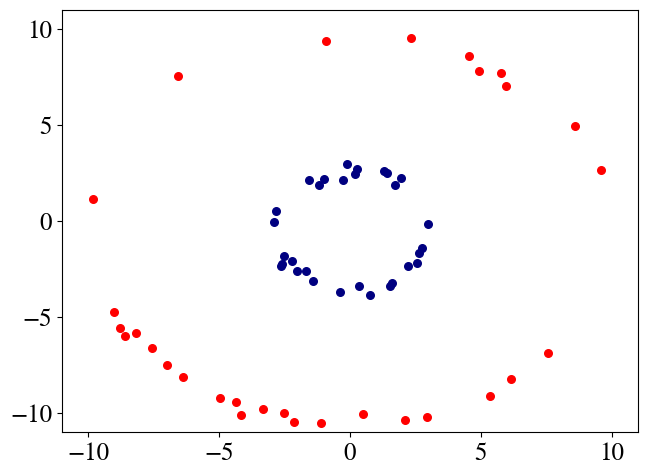

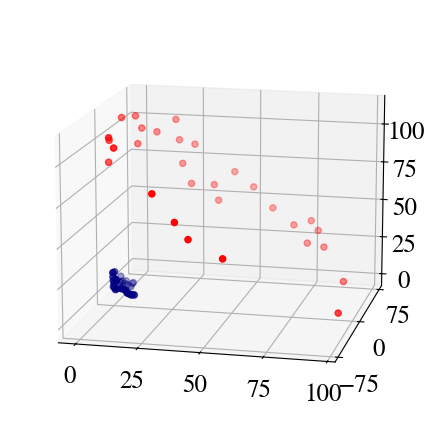

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

def f_outer(x1):
	result = []
	for x in x1:
		side = random.uniform(0, 1)
		sq = math.sqrt(10 * 10 - x * x)
		if side > 0.5:
			sq = sq * (-1)
		result.append(sq)
	return np.asarray(result)

def f_inner(x1):
	result = []
	for x in x1:
		side = random.uniform(0, 1)
		sq = math.sqrt(3 * 3 - x * x)
		if side > 0.5:
			sq = sq * (-1)
		result.append(sq)
	return np.asarray(result)


# generate points and keep a subset of them
x_inner = np.linspace(-3, 3, 100)
x_outer = np.linspace(-10, 10, 100)

rng = np.random.RandomState(0)
rng.shuffle(x_inner)
rng.shuffle(x_outer)

x_inner = np.sort(x_inner[:30])
x_outer = np.sort(x_outer[:30])

noize = [(-1 + np.random.random()) for i in range(len(x_inner))]
y_inner = f_inner(x_inner) + noize

noize = [(-1 + np.random.random()) for i in range(len(x_outer))]
y_outer = f_outer(x_outer) + noize

colors = ['blue', 'red']#, 'orange'
lw = 2

type_of_regression = ["linear regression", "regression of degree 10"]
fit = ["fit", "overfit"]

plt.figure(1)
axes = plt.gca()
axes.set_xlim([-11,11])
axes.set_ylim([-11,11])

plt.scatter(x_inner, y_inner, color='navy', s=30, marker='o')
plt.scatter(x_outer, y_outer, color='red', s=30, marker='o')

fig1 = plt.gcf()

fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
plt.show()

x_inner_transformed = np.asarray([x * x for x in x_inner])
y_inner_transformed = np.asarray([math.sqrt(2) * x * y for x, y in zip(x_inner, y_inner)])
z_inner_transformed = np.asarray([y * y for y in y_inner])

x_outer_transformed = np.asarray([x * x for x in x_outer])
y_outer_transformed = np.asarray([math.sqrt(2) * x * y for x, y in zip(x_outer, y_outer)])
z_outer_transformed = np.asarray([y * y for y in y_outer])

plt.figure(2)
fig = plt.gcf()
ax = fig.add_subplot(111, projection='3d')
ax.set_yticks([-75, 0, 75])

ax.scatter(x_inner_transformed, y_inner_transformed, z_inner_transformed, color='navy', marker='o')
ax.scatter(x_outer_transformed, y_outer_transformed, z_outer_transformed, color='red', marker='o')

ax.view_init(14, -77)

fig.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
plt.show()